# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Task 1: Data Validation

## Import Libraries for Data Analysis

Loading the following libraries for data handling and visualization:

- **Pandas**: Data manipulation
- **NumPy**: Numerical computations
- **Matplotlib** & **Seaborn**: Visualization

Now, we can begin our data exploration.

In [42]:
# Importing required libraries and getting overview to start cleaning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Product Sales Dataset Overview**

## 1. **Dataset Overview**
   We’ll start by exploring our product sales data, focusing on sales methods, customer metrics, and regional patterns. By    beginning with a general overview, we set the stage for a deeper exploration into sales performance and customer behaviors.


In [43]:
# Load the dataset
product_sales = pd.read_csv('product_sales.csv')

# Preview the dataframe
product_sales

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [44]:
# Check how many total rows and columns
product_sales.shape

(15000, 8)

---

### Initial Observations

From our initial review, we see that the dataset offers valuable insights into product sales, including sales methods, customer engagement, and regional performance. The dataset consists of 15,000 rows and 8 columns. We’ve identified missing values specifically in the revenue column. Addressing this issue will be essential before diving deeper into the analysis.

### Findings So Far

**Rich Data**: The dataset provides a comprehensive view of sales performance, customer metrics, and geographic distribution, forming a solid basis for our analysis.

---

## 2- Understanding the Data

To effectively analyze our dataset, we first need to understand its structure and completeness. This involves identifying any columns with missing values and evaluating the overall data quality. We’ll start by examining these aspects to ensure our analysis is built on a solid foundation.

In [45]:
# Display information about the dataset
print("DataFrame summary:")

product_sales.info()

DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


---

### Insights from the Data

We found several key insights:

1. **Dataset Size and Structure**: The dataset comprises 15,000 rows and 8 columns, offering a comprehensive view of our product sales. The columns include a mix of data types: integers, floats, and objects.

2. **Completeness of Data**:
    - The columns `week`, `sales_method`, `customer_id`, `nb_sold`, `years_as_customer`, `nb_site_visits`, and `state` are complete with no missing values.
    - The `revenue` column contains missing values:
        - `revenue`: 13,926 non-null entries, indicating missing values.

3. **Memory Usage**: The dataset uses approximately 937.6 KB of memory, which is manageable for our analysis.

4. **Data Cleaning**: The presence of missing values in the `revenue` column highlights the need for data cleaning before we proceed with further analysis. Addressing these missing values will ensure the accuracy and reliability of our insights.

By understanding the completeness and structure of the dataset, we can effectively plan our data cleaning and preprocessing steps to ensure a robust analysis of product sales.

---

## 3- Statistical Summary of the Product Sales Dataset

Building on our understanding of the dataset’s structure, we now examine the statistical summary. This will offer insights into key metrics such as sales quantities, revenue distributions, and customer behaviors, helping us identify important trends and patterns.

In [46]:
# Describe the dataset
product_sales.describe(include='all')

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
count,15000.000000,15000,15000,15000.000000,13926.000000,15000.000000,15000.000000,15000
unique,NaN,5,15000,NaN,NaN,NaN,NaN,50
top,NaN,Email,2e72d641-95ac-497b-bbf8-4861764a7097,NaN,NaN,NaN,NaN,California
freq,NaN,7456,1,NaN,NaN,NaN,NaN,1872
mean,3.098267,NaN,NaN,10.084667,93.934943,4.965933,24.990867,NaN
std,1.656420,NaN,NaN,1.812213,47.435312,5.044952,3.500914,NaN
min,1.000000,NaN,NaN,7.000000,32.540000,0.000000,12.000000,NaN
25%,2.000000,NaN,NaN,9.000000,52.470000,1.000000,23.000000,NaN
50%,3.000000,NaN,NaN,10.000000,89.500000,3.000000,25.000000,NaN
75%,5.000000,NaN,NaN,11.000000,107.327500,7.000000,27.000000,NaN


---

### Insights from the Statistical Summary

From the statistical summary, we can observe the following key insights:

1. **Sales Metrics**:
    - **`nb_sold`**: Average of approximately 10.08 units sold per transaction, with a range from 7 to 16 units.

    - **`Revenue`**: The average revenue stands at approximately `$93.93`, with individual values fluctuating between `$32.54` and `$238.32`.

2. **Customer and Sales Methods**:
    - **`sales_method`**: 'Email' is the most frequently used sales method, appearing 7,456 times.
    - **`customer_id`**: Each customer ID is unique, with no duplicates.
    
3. **Customer Engagement**:
    - **`nb_site_visits`**: Average of about 25 visits, with a range from 12 to 41 visits.

    - **`years_as_customer`**: The average customer tenure is about 5 years, with values ranging from 0 to 63 years. The upper end of this range includes values beyond the expected maximum of 39 years, highlighting the presence of outliers that need to be addressed for a more accurate analysis.

4. **Geographical Distribution**:
    - **`state`**: 'California' is the most common shipping state, appearing 1,872 times.

These statistics provide a comprehensive view of our sales data, offering valuable insights into sales performance, customer behaviors, and regional distribution.

---

## 4- Checking for and Calculating Missing Data Percentages

To ensure the accuracy and reliability of our analysis, it is crucial to identify and address any missing values in our product sales dataset. We will examine each column for missing values and calculate the percentage of missing data. This will help us gauge the extent of missing values and determine which columns require the most attention during the data cleaning process.

In [47]:
# Define indicators for missing values across different formats (e.g., empty strings, spaces, dashes, 'missing')
missing_value_indicators = ['', ' ', '-', '--', 'missing', 'Missing', 'N/A', 'n/a', None]

# Replace any detected missing value indicators in the product_sales DataFrame with pandas' NA value
product_sales.replace(missing_value_indicators, pd.NA, inplace=True)

# Identify and count the missing values in each column of the product_sales DataFrame
missing_data = product_sales.isna().sum()

# Calculate the total number of rows in the DataFrame for reference
total_rows = product_sales.shape[0]

# Compute the percentage of missing data for each column based on the total number of rows
missing_percentage = (missing_data / total_rows) * 100

# Create a summary DataFrame that combines both the counts and percentages of missing data
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

# Output the summary table to provide an overview of missing data in the dataset
print("Summary of Missing Values:")
missing_summary

Summary of Missing Values:


,Missing Values,Percentage
week,0,0.00
sales_method,0,0.00
customer_id,0,0.00
nb_sold,0,0.00
revenue,1074,7.16
years_as_customer,0,0.00
nb_site_visits,0,0.00
state,0,0.00


---

### Summary of Missing Values

To ensure our dataset is accurate, we first addressed various ways of indicating missing data. We looked for common indicators such as `['', ' ', '-', '--', 'missing', 'Missing', 'N/A', 'n/a', None]` to make sure no gaps were overlooked.

**Missing Values Overview**:
   - **`revenue`**: This column has 1,074 missing entries, which is about 7.16% of the data.
   - **Other Columns**: We found no missing values in `week`, `sales_method`, `customer_id`, `nb_sold`, `years_as_customer`, `nb_site_visits`, or `state`.

By standardizing how we handle missing data and carefully addressing these gaps, we help ensure that our dataset remains accurate and reliable for analysis.

---

## 5- Imputing Missing Values

To handle the missing values in our dataset, we will use imputation techniques directly on the DataFrame. For the `revenue` column, which contains numerical data, we will fill in the missing values with the mean of the existing entries. This approach helps to maintain the overall trend in the data and ensures our dataset is complete and ready for further analysis.

By applying this imputation method, we aim to enhance the reliability and accuracy of our dataset, enabling us to extract more meaningful insights from the data.

In [48]:
# Fill missing 'revenue' values with the column's mean
product_sales.fillna({'revenue': product_sales['revenue'].mean()}, inplace=True)

# Check if all missing values are handled
print('Number of missing values (null) per column:')
product_sales.isna().sum()

Number of missing values (null) per column:


week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

---

### Verification of Imputation

Now we are sure that the missing values in the `revenue` column have been successfully handled. This ensures our dataset is complete and ready for further analysis. With these adjustments, we can move forward confidently, knowing that our data integrity is maintained and our analysis will be accurate and reliable.

---

## 6- Identifying and Removing Duplicate Rows

To ensure the quality of our dataset, we need to check for and remove any duplicate rows. Duplicates can skew our analysis and lead to inaccurate results. In this step, we will identify any duplicate entries and remove them to maintain the integrity of our data.

In [49]:
# Count duplicate rows
duplicate_count = product_sales.duplicated(keep=False).sum()

# Remove all duplicates in place
product_sales.drop_duplicates(keep=False, inplace=True)

# Print the number of removed duplicates, with a conditional message
if duplicate_count > 0:
    msg = f"Number of duplicate rows removed: {duplicate_count}"
else:
    msg = "No duplicate rows found."
print(msg)

No duplicate rows found.


---

### Duplicate Rows Analysis

After checking for duplicate rows, we found that there were no duplicates in the dataset. This confirms that our data is clean and free from redundant entries, allowing us to proceed with our analysis with confidence in its accuracy.

---

## 7- Verifying Column Validation and Consistency

In this section, we will focus on validating each column to ensure that the data is accurate and consistent. This involves checking that data types are correct, values fall within expected ranges, and there are no anomalies. Proper validation of each column will help maintain the integrity of our dataset and ensure that our analysis is based on reliable and consistent data.

### 7.1- Verifying Unique Values in the 'Week' Column

To ensure the accuracy of our dataset, we need to check the unique values present in the `week` column. This step helps us confirm that the `week` values are consistent with the expected range and that there are no anomalies or unexpected entries.

In [50]:
# Verify unique values in 'week' column
product_sales['week'].value_counts()

week
1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: count, dtype: int64

The `week` column contains entries for weeks 1 through 6, with varying frequencies. The data appears consistent and falls within the expected range, indicating that the column is correctly populated and validated.


### 7.2 Checking Unique Values in 'sales_method'

We need to ensure that the categories in the `sales_method` column, we need to review the unique values for any variations or inconsistencies. This includes variations in capitalization and similar discrepancies. We'll address these issues to maintain uniformity in our data.

In [51]:
# Verify unique values in 'sales_method' column
product_sales['sales_method'].value_counts()

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

We noticed that similar methods are recorded with different capitalizations and variations (e.g., "Email" vs. "email" and "Email + Call" vs. "em + call"). To ensure consistency, we need to standardize these entries so that all variations are correctly handled. This will improve data quality and accuracy in our analysis.


#### Standardizing the 'Sales Method' Column

To improve consistency in the `sales_method` column, we will clean up the entries by merging similar categories. This involves standardizing variations such as different capitalizations and abbreviations to ensure that all entries are uniformly represented.


In [52]:
# Clean up the 'sales_method' column to merge similar categories
product_sales['sales_method'] = product_sales['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})
product_sales['sales_method'].value_counts()

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64

---

The cleanup process has successfully merged similar categories, ensuring that variations like "em + call" and "email" are now consistently recorded as "Email + Call" and "Email," respectively. This standardization enhances the accuracy and reliability of our data for further analysis.

---

### 7.3- Verifying and Cleaning the 'Years as Customer' Column

As noted from the dataset description, the `years_as_customer` column contains values up to 63 years. Given that Pens and Printers was founded in 1984, the maximum reasonable customer tenure is 39 years. Therefore, any values exceeding this threshold are considered outliers and need to be addressed.


In [53]:
# Remove outliers (values greater than 39 years)
product_sales = product_sales.loc[product_sales['years_as_customer'] <= 39]

# Verify that all remaining values are within the acceptable range
# Print the minimum and maximum values to ensure they fall within the expected range
print("Min value in 'years_as_customer':", product_sales['years_as_customer'].min())
print("Max value in 'years_as_customer':", product_sales['years_as_customer'].max())


Min value in 'years_as_customer': 0
Max value in 'years_as_customer': 39


---

We have successfully removed the outliers from the `years_as_customer` column. The minimum value is now 0, and the maximum value is 39, ensuring that all remaining values fall within the expected range of 0 to 39 years. This confirms that the data is clean and suitable for further analysis.

---

### 7.4 Validating the 'State' Column

To ensure the integrity of the data in the `state` column, we need to validate and clean the entries. This step involves standardizing the state names to remove any discrepancies, such as leading or trailing spaces, and ensuring that all state names are properly capitalized. We also compare the state values against a list of valid U.S. states to identify any potential errors or invalid entries.

In [54]:
# Define a list of valid U.S. states (full names)
valid_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 
    'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 
    'West Virginia', 'Wisconsin', 'Wyoming'
]

# Step 1: Strip any leading/trailing spaces and standardize capitalization
product_sales['state'] = product_sales['state'].str.strip().str.title()

# Step 2: Identify any states not in the valid list
invalid_states = product_sales[~product_sales['state'].isin(valid_states)]

# Display the invalid state entries (if any)
print(f"Invalid state entries: {invalid_states['state'].unique()}")

# Verify the unique valid states after cleaning
unique_states = len(product_sales['state'].unique())
print(f"Validation successful: {unique_states} unique state entries found in the dataset, all correctly formatted.")

Invalid state entries: []
Validation successful: 50 unique state entries found in the dataset, all correctly formatted.


After performing the validation, we confirmed that there are no invalid state entries in the dataset. The `state` column now contains 50 unique valid state names, confirming that all data entries are accurate and consistent. This validation step helps maintain the quality and reliability of our dataset as we move forward with the analysis.

## Data Validation Summary

- **Week**: Data spans from week 1 to week 6, providing a complete timeframe for the initial sales period. No issues were found, and the data is accurate.

- **Sales Method**: Cleaned up variations in the 'sales_method' column by standardizing capitalization and similar entries into consistent categories: 'Email', 'Email + Call', and 'Call'. This standardization ensures accurate analysis of sales approaches.

- **Customer ID**: All 15,000 entries are unique, making this column accurate and ready for analysis.

- **Nb_sold**: The number of products sold per transaction ranges from 7 to 16, reflecting moderate volume sales.

- **Revenue**: Imputed missing values using the mean to maintain data integrity, ensuring accurate financial analysis.

- **Years as Customer**: Removed outliers exceeding 39 years, aligning the data with the expected customer tenure range.

- **Nb_site_visits**: The number of site visits per customer ranges from 12 to 41, with the average being around 25 visits.

- **State**: Verified and cleaned the 'state' column, ensuring 50 unique valid state entries. The data is now consistent and accurate.

# **Task 2: Exploratory Analysis**

## **1. What is the Distribution of Sales Methods Used by Customers?**

In this section, we will visualize the distribution of sales methods used by customers through a bar chart. This visualization will help us understand the popularity of different sales approaches and their impact on customer engagement. By examining the frequency of each sales method, we can gain insights into customer preferences and identify the most effective strategies for reaching our audience.

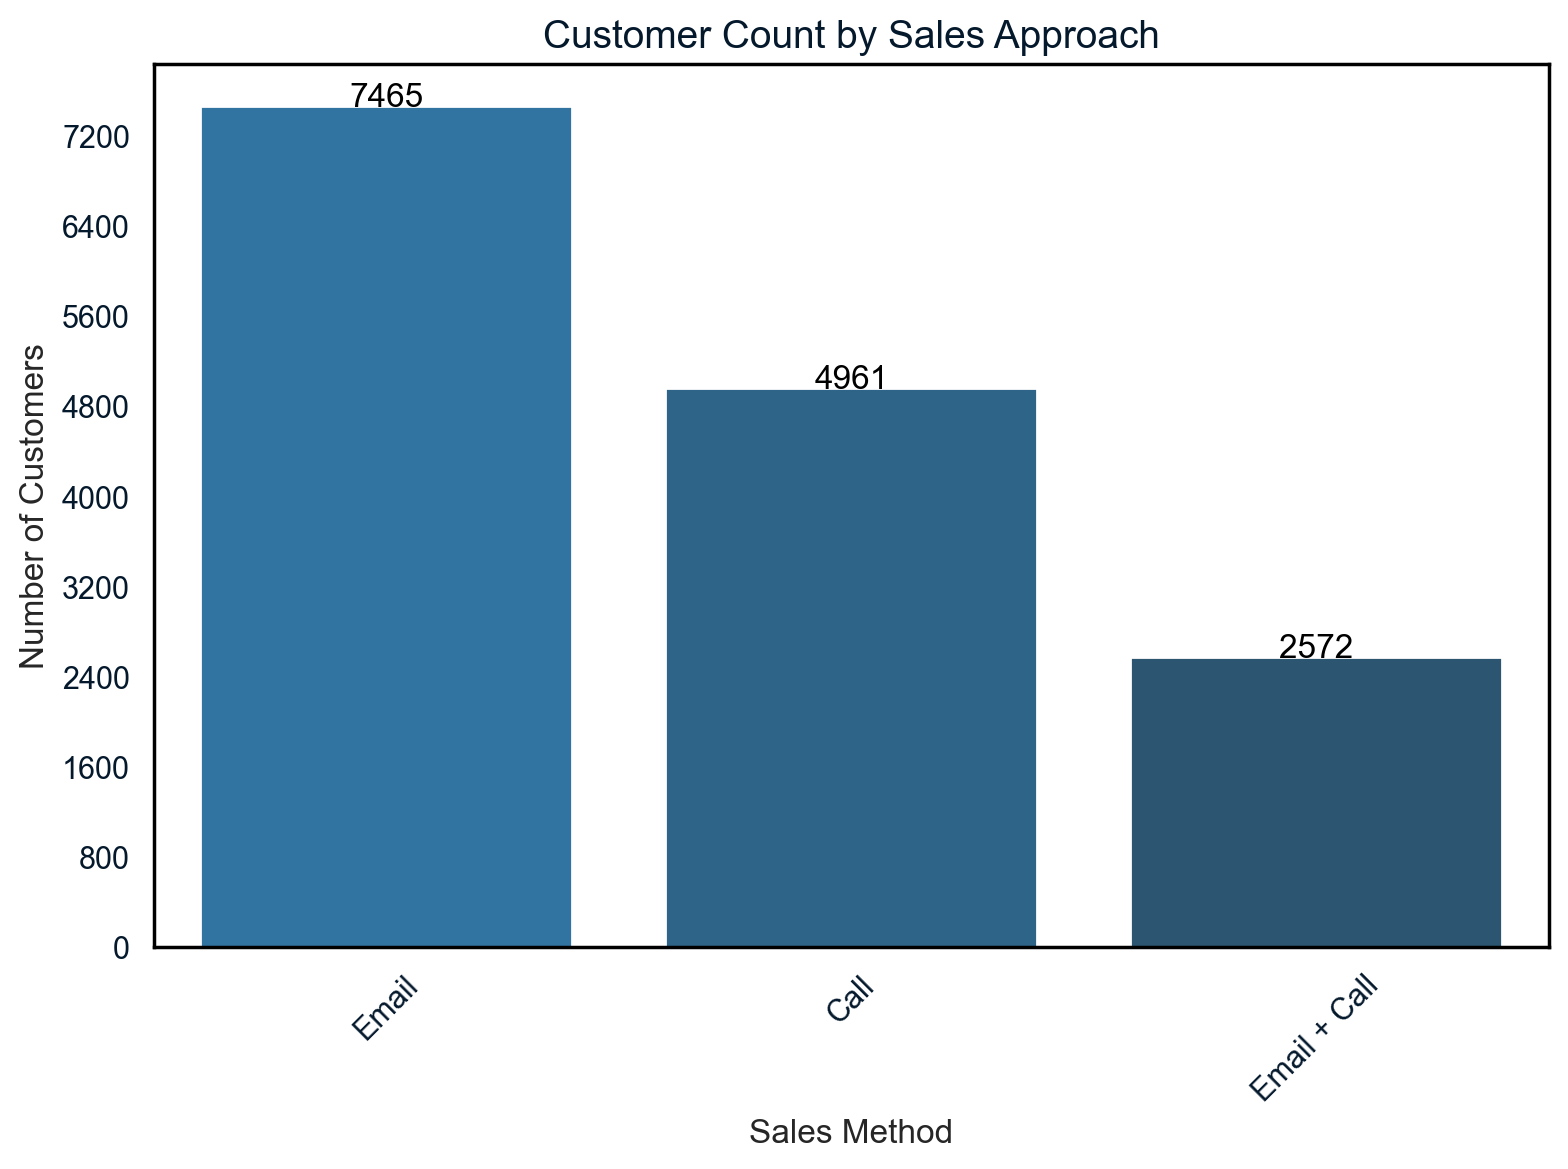

In [55]:

# Set the figure size and theme
plt.figure(figsize=(8, 6))
sns.set_theme(style="white")

# Create a dark color palette
color_palette = sns.dark_palette("#1f77b4", reverse=True, as_cmap=False)

# Use countplot to visualize the number of customers for each sales method with dark color
ax = sns.countplot(x='sales_method', data=product_sales, palette=color_palette, order=product_sales['sales_method'].value_counts().index)

# Add text labels on the bars, removing the .0 and formatting numbers
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black')

# Customize plot with axes and black borders
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
for spine in ax.spines.values():
    spine.set_edgecolor('black')

# Draw x and y axes with ticks
ax.axhline(0, color="black", linewidth=1)
ax.axvline(-0.5, color="black", linewidth=1)
ax.tick_params(axis='both', which='both', length=5, color='black')

# Set ticks for x and y axes
ax.set_xticks(range(len(product_sales['sales_method'].value_counts().index)))
ax.set_xticklabels(product_sales['sales_method'].value_counts().index, rotation=45)
ax.set_yticks(range(0, int(max(product_sales['sales_method'].value_counts())) + 1))

# Set titles and labels
plt.title('Customer Count by Sales Approach', fontsize=14)
plt.xlabel('Sales Method', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


The bar chart provides a clear view of the distribution of sales methods among our customers:

- **Email** is the predominant sales method, utilized by 7,465 customers. This suggests that email communication is the most favored approach, likely due to its efficiency and the convenience it offers for both customers and the sales team.
  
- **Call** is the second most common method, with 4,961 customers opting for direct phone interactions. This indicates a significant preference for personalized, real-time communication, which can be valuable for building stronger customer relationships.

- **Email + Call** is employed by 2,572 customers, reflecting a combination of email and phone communication. This dual approach, though less frequent, shows that some customers may prefer a multi-channel engagement strategy, which could be used to enhance overall sales effectiveness.

These insights reveal that while email is the most widely used method, there is a notable preference for direct phone calls as well. The combination of both methods highlights a segment of customers who value comprehensive communication strategies. Understanding these preferences allows us to refine our sales approaches to better meet customer needs and optimize engagement.

## **2. What is the Distribution of Revenue?**

To understand the distribution of revenue across different transactions, we analyze the revenue generated in each sale. This histogram provides a visual representation of how frequently each revenue range occurs, helping us identify key trends, peak revenue points, and areas where revenue is less concentrated.

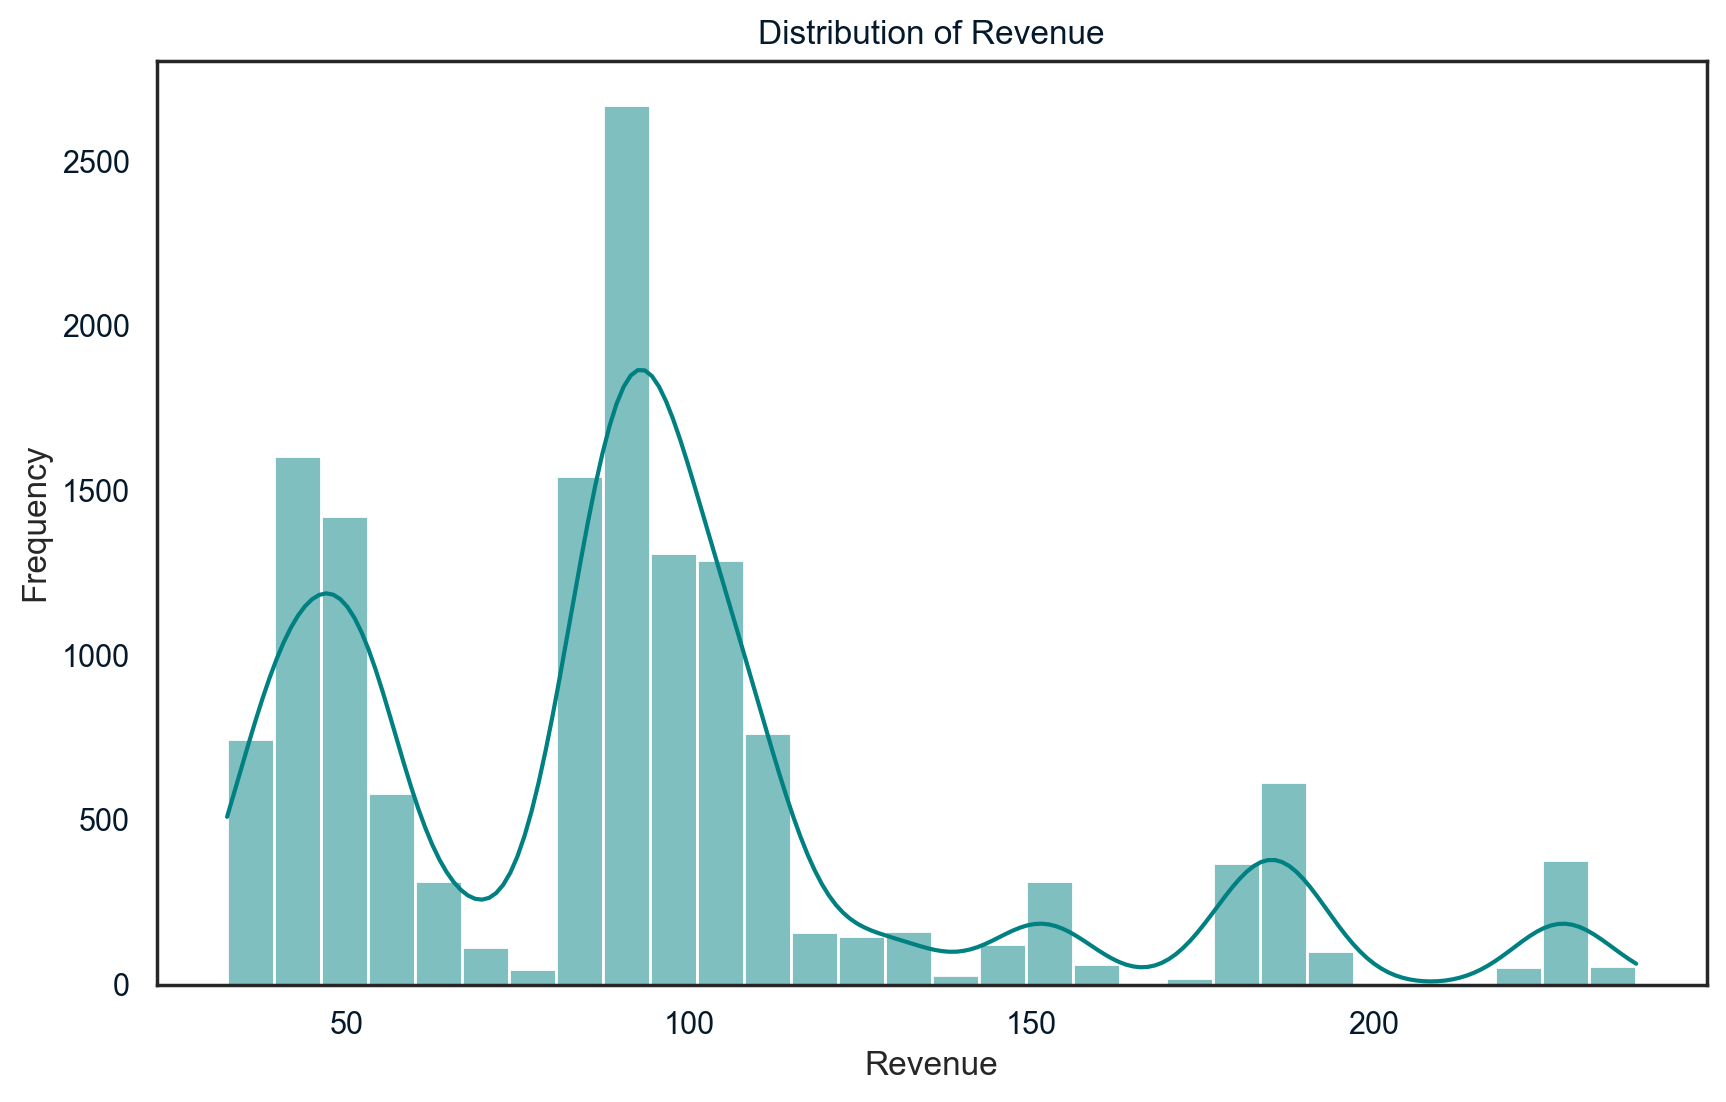

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(product_sales['revenue'], bins=30, color='teal', kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

### Insights from the Revenue Distribution

The histogram reveals several key insights about our revenue distribution:

- **Peak Performance**: The highest frequency of sales occurs in the 50 to 90 range, with noticeable peaks at quantities of 50 and 90. This indicates that these quantities might represent popular product bundles or optimal pricing points.
  
- **Valleys and Peaks**: The histogram shows lower frequencies in the ranges around 70 and above 120. These lower areas suggest less frequent sales, which may indicate less popular products or pricing points that are less effective.

Overall, the data shows that the most common number of products sold falls within the $50-$90 range, with a notable concentration in the $80-$90 range. This information can help in pricing strategies and inventory management by focusing on the quantities that drive higher sales volumes.

## **3. How Does Revenue Distribution Vary Across Different Sales Methods?**

To gain insights into how different sales methods contribute to our total revenue, we’ll examine the revenue distribution across each sales approach. The pie chart below illustrates the percentage of total revenue generated by each method, helping us understand the effectiveness of each sales strategy.


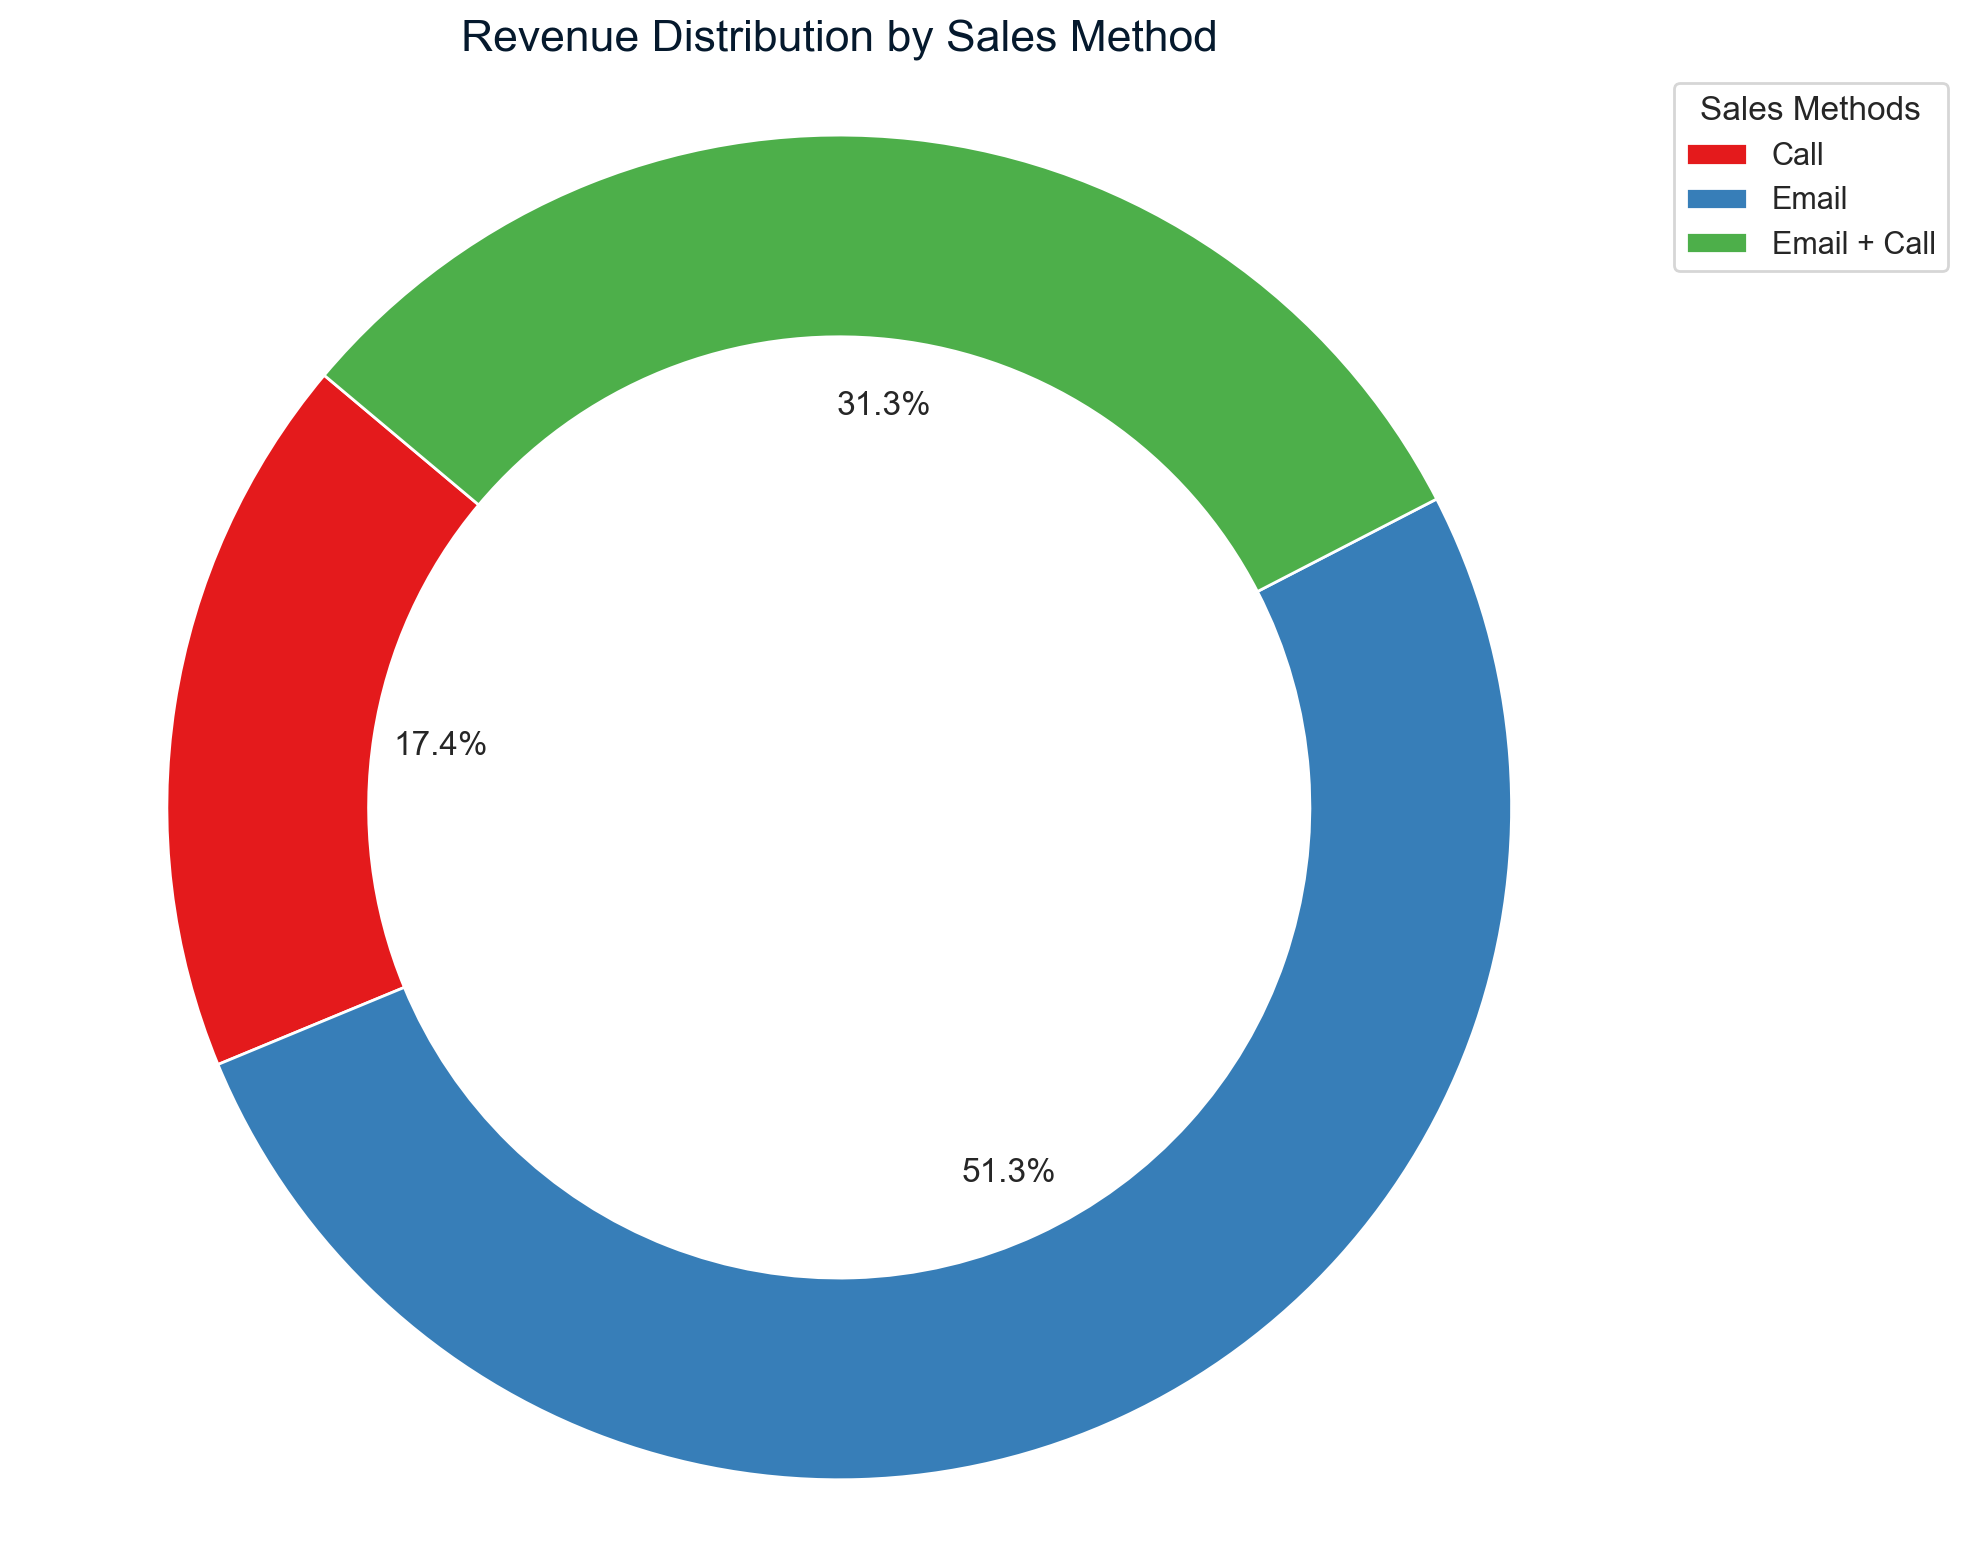

In [57]:
# Calculate total revenue by sales method
revenue_by_method = product_sales.groupby('sales_method')['revenue'].sum().reset_index()

# Create a pie chart with percentages, labels, and a legend
plt.figure(figsize=(10, 8))
colors = plt.cm.Set1(range(len(revenue_by_method)))

# Plot pie chart
plt.pie(revenue_by_method['revenue'], 
        autopct='%1.1f%%',
        colors=colors,
        startangle=140,
        wedgeprops=dict(width=0.3))  # A slightly hollow pie to improve readability

# Add a title
plt.title('Revenue Distribution by Sales Method', fontsize=16)

# Add a legend
plt.legend(revenue_by_method['sales_method'], title="Sales Methods", loc="upper left", bbox_to_anchor=(1, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Adjust layout to make room for the legend
plt.tight_layout()

# Show plot
plt.show()


### Pie Chart Insights

The pie chart provides a clear breakdown of revenue contributions from each sales method:

- **Email** is the most effective sales method, generating **51.3%** of the total revenue. This indicates that email campaigns have a substantial impact on revenue generation.
- **Email + Call** contributes **31.3%** of the revenue. This combined approach remains significant, showing that integrating multiple strategies yields substantial results.
- **Call** accounts for **17.4%** of the revenue. While this method contributes less compared to the others, it still plays a role in the overall revenue strategy.

These insights highlight that email remains the most powerful tool in our sales strategy, while the combined method also performs well. Calls, though less effective on their own, still contribute to the revenue and could be enhanced by further strategic adjustments.

## **4. How Does the Number of Site Visits Relate to the Number of Products Sold?**

To understand how site visits impact product sales, we will explore the relationship between the number of site visits and the quantity of products sold. By analyzing this relationship, we aim to uncover insights into how increasing site traffic might influence sales performance. The scatter plot below visualizes this relationship, with each point representing a period's data on site visits and sales figures. We will also identify any trends or patterns to guide strategic decisions.

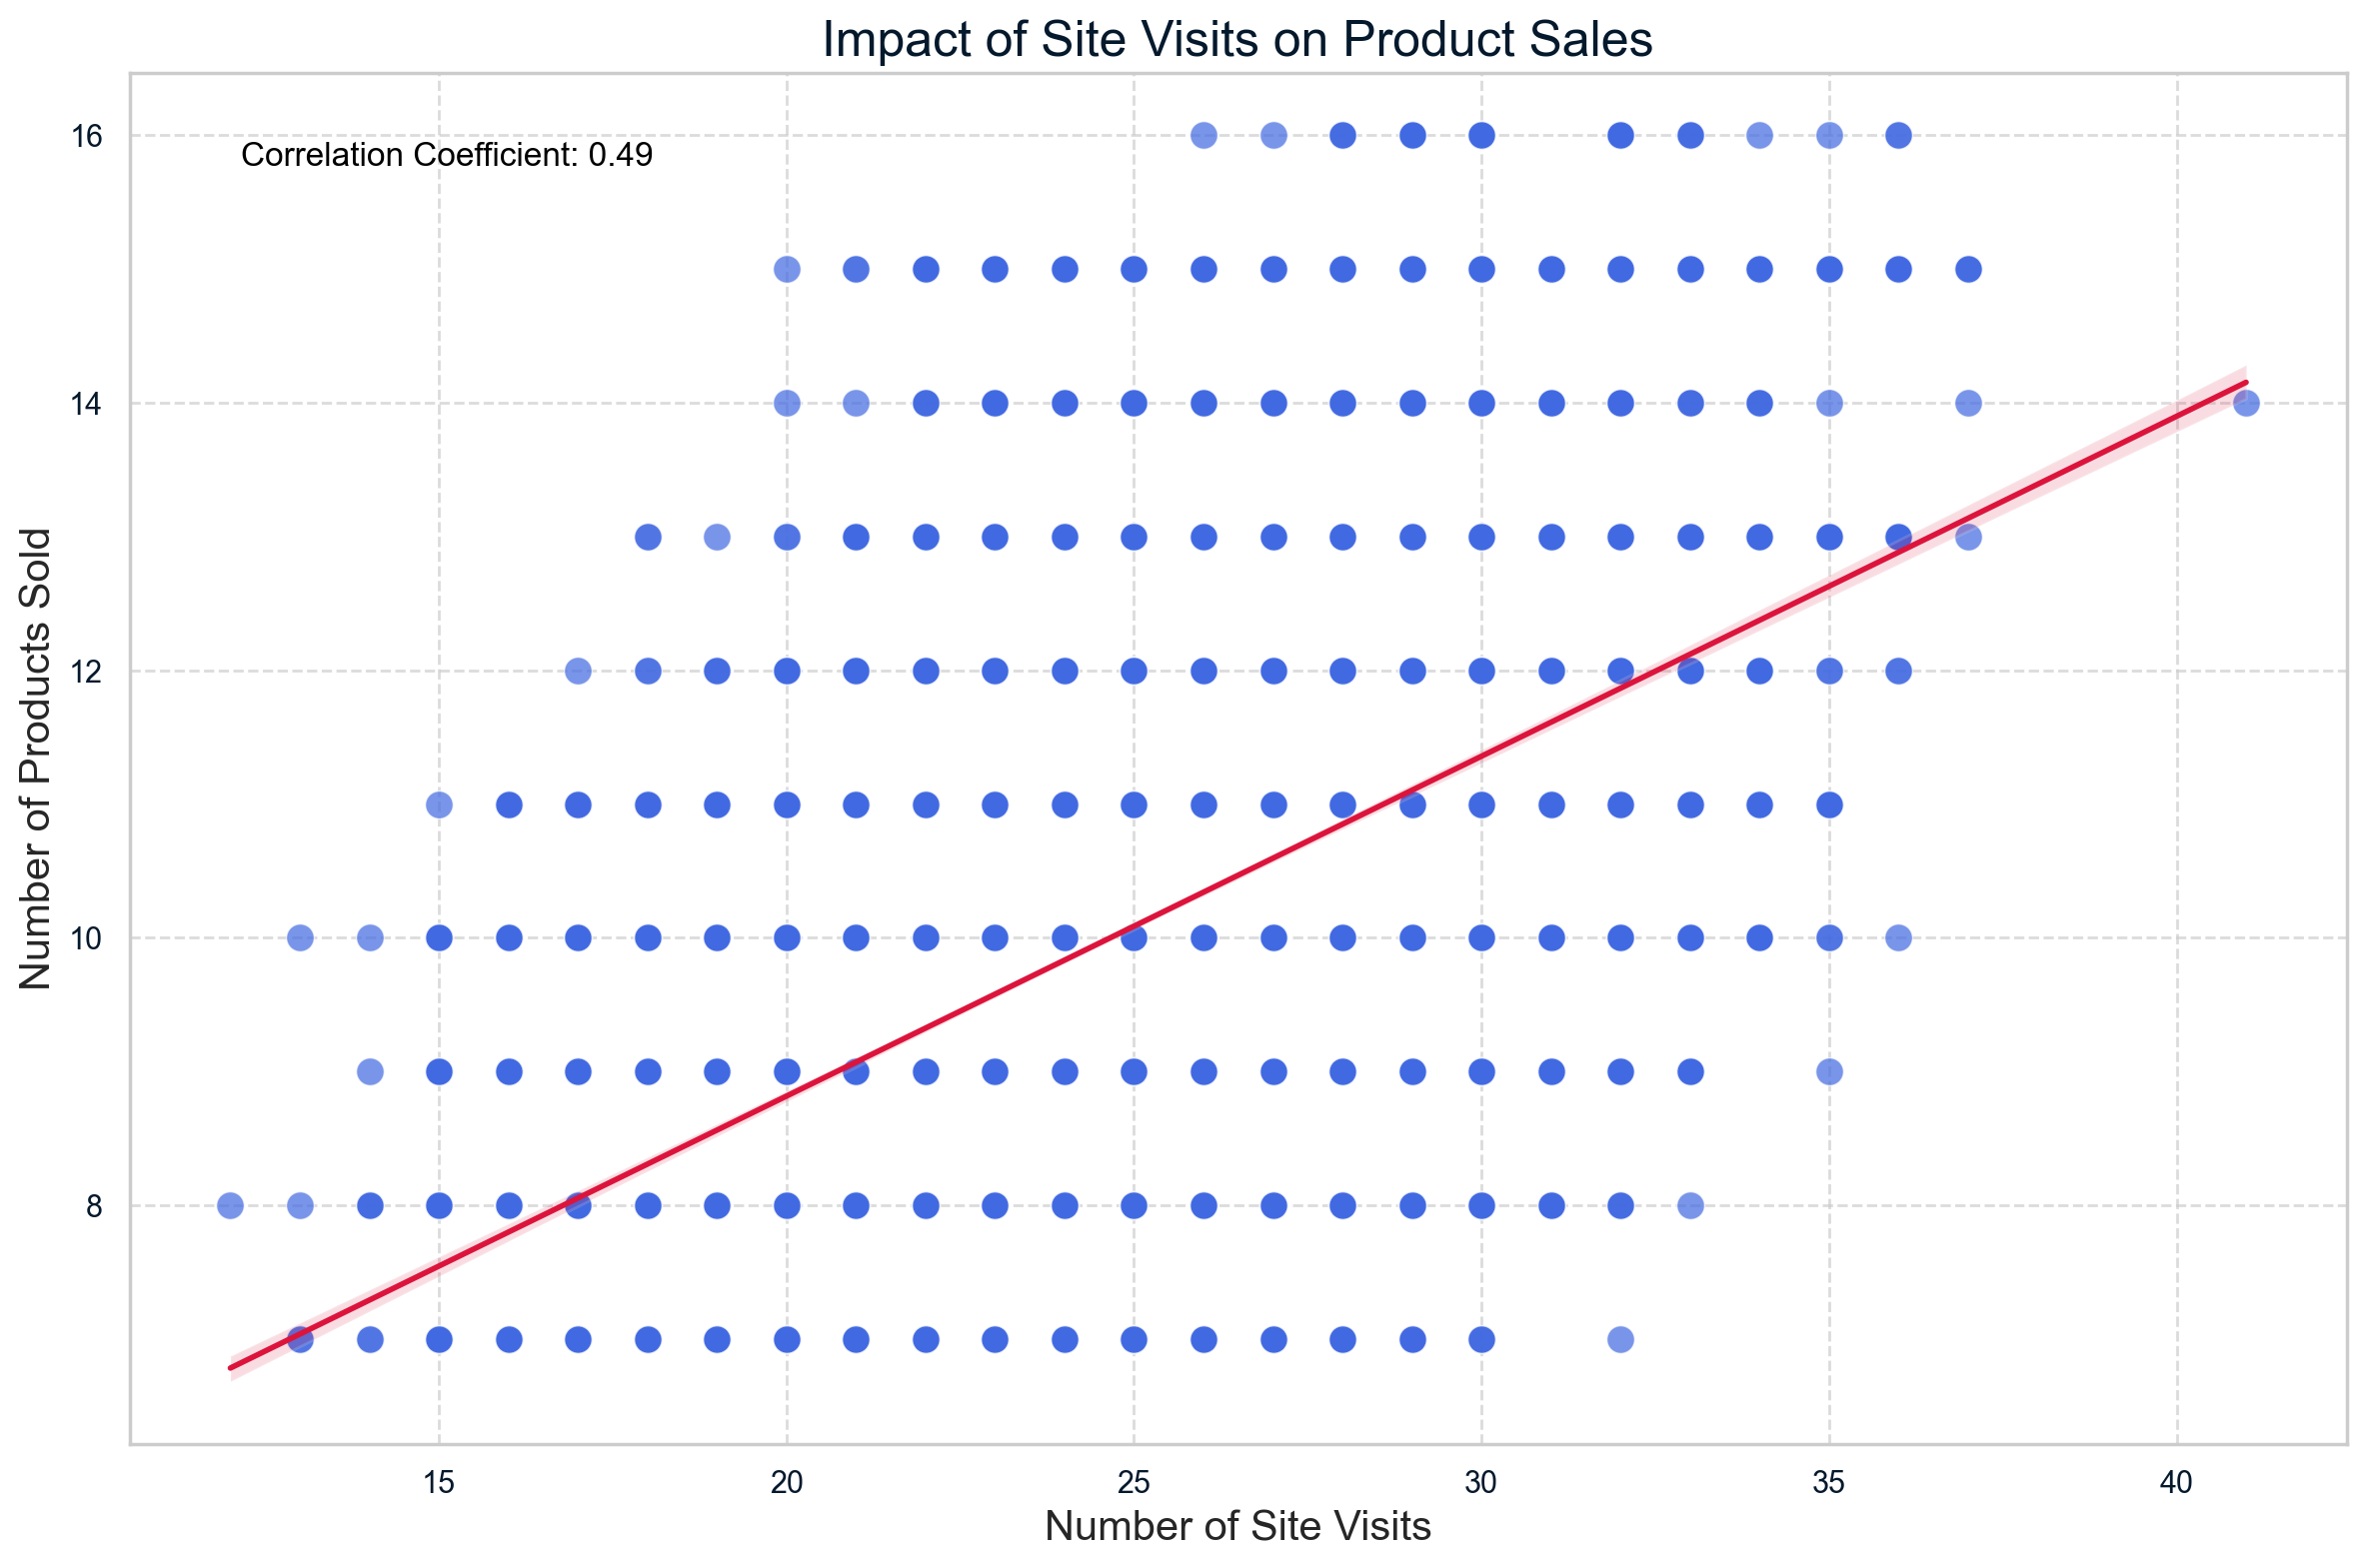

In [58]:
# Calculate the correlation coefficient
correlation = product_sales['nb_site_visits'].corr(product_sales['nb_sold'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Scatter plot
sns.scatterplot(x='nb_site_visits', y='nb_sold', data=product_sales, color='royalblue', alpha=0.7, s=100, edgecolor='w', linewidth=0.5)

# Add a regression line to the scatter plot
sns.regplot(x='nb_site_visits', y='nb_sold', data=product_sales, scatter=False, color='crimson', line_kws={'linewidth': 2})

# Add a correlation coefficient annotation
plt.text(0.05, 0.95, f'Correlation Coefficient: {correlation:.2f}', fontsize=12, color='black', ha='left', va='top', transform=plt.gca().transAxes)

# Set titles and labels
plt.title('Impact of Site Visits on Product Sales', fontsize=18)
plt.xlabel('Number of Site Visits', fontsize=15)
plt.ylabel('Number of Products Sold', fontsize=15)

# Show grid lines and adjust layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Insights

- **Moderate Positive Correlation (0.49)**: The correlation coefficient of 0.49 indicates a moderate positive relationship between site visits and product sales. This means that, in general, increased site visits tend to be associated with higher sales. However, this relationship is not strong enough to make precise predictions about sales based solely on site visits.

- **Sales Trends**: The scatter plot reveals a general trend where more site visits are linked with increased sales. Nevertheless, the variability in the data points suggests that site visits alone do not fully explain sales performance. Other factors are likely influencing sales outcomes.

- **Trend Line Analysis**: The red trend line on the scatter plot provides a visual guide to the overall relationship between site visits and sales. While it shows a positive trend, it’s important to note that the line represents a general pattern and may not capture all nuances. For more accurate sales forecasting, additional variables and factors should be considered.

### Suggestion

To capitalize on the positive relationship between site visits and sales, consider enhancing the website's effectiveness. Improving the website’s user interface, optimizing it for better performance, and increasing promotional activities could help drive more site visits and, consequently, higher sales. By addressing these areas, you can potentially strengthen the correlation and boost overall revenue.

## **5. What Do the Revenue Trends Reveal About Our Sales Methods?**

The chart provides a clear illustration of the revenue trends over a six-week period for the different sales methods: Call, Email, and Email + Call.

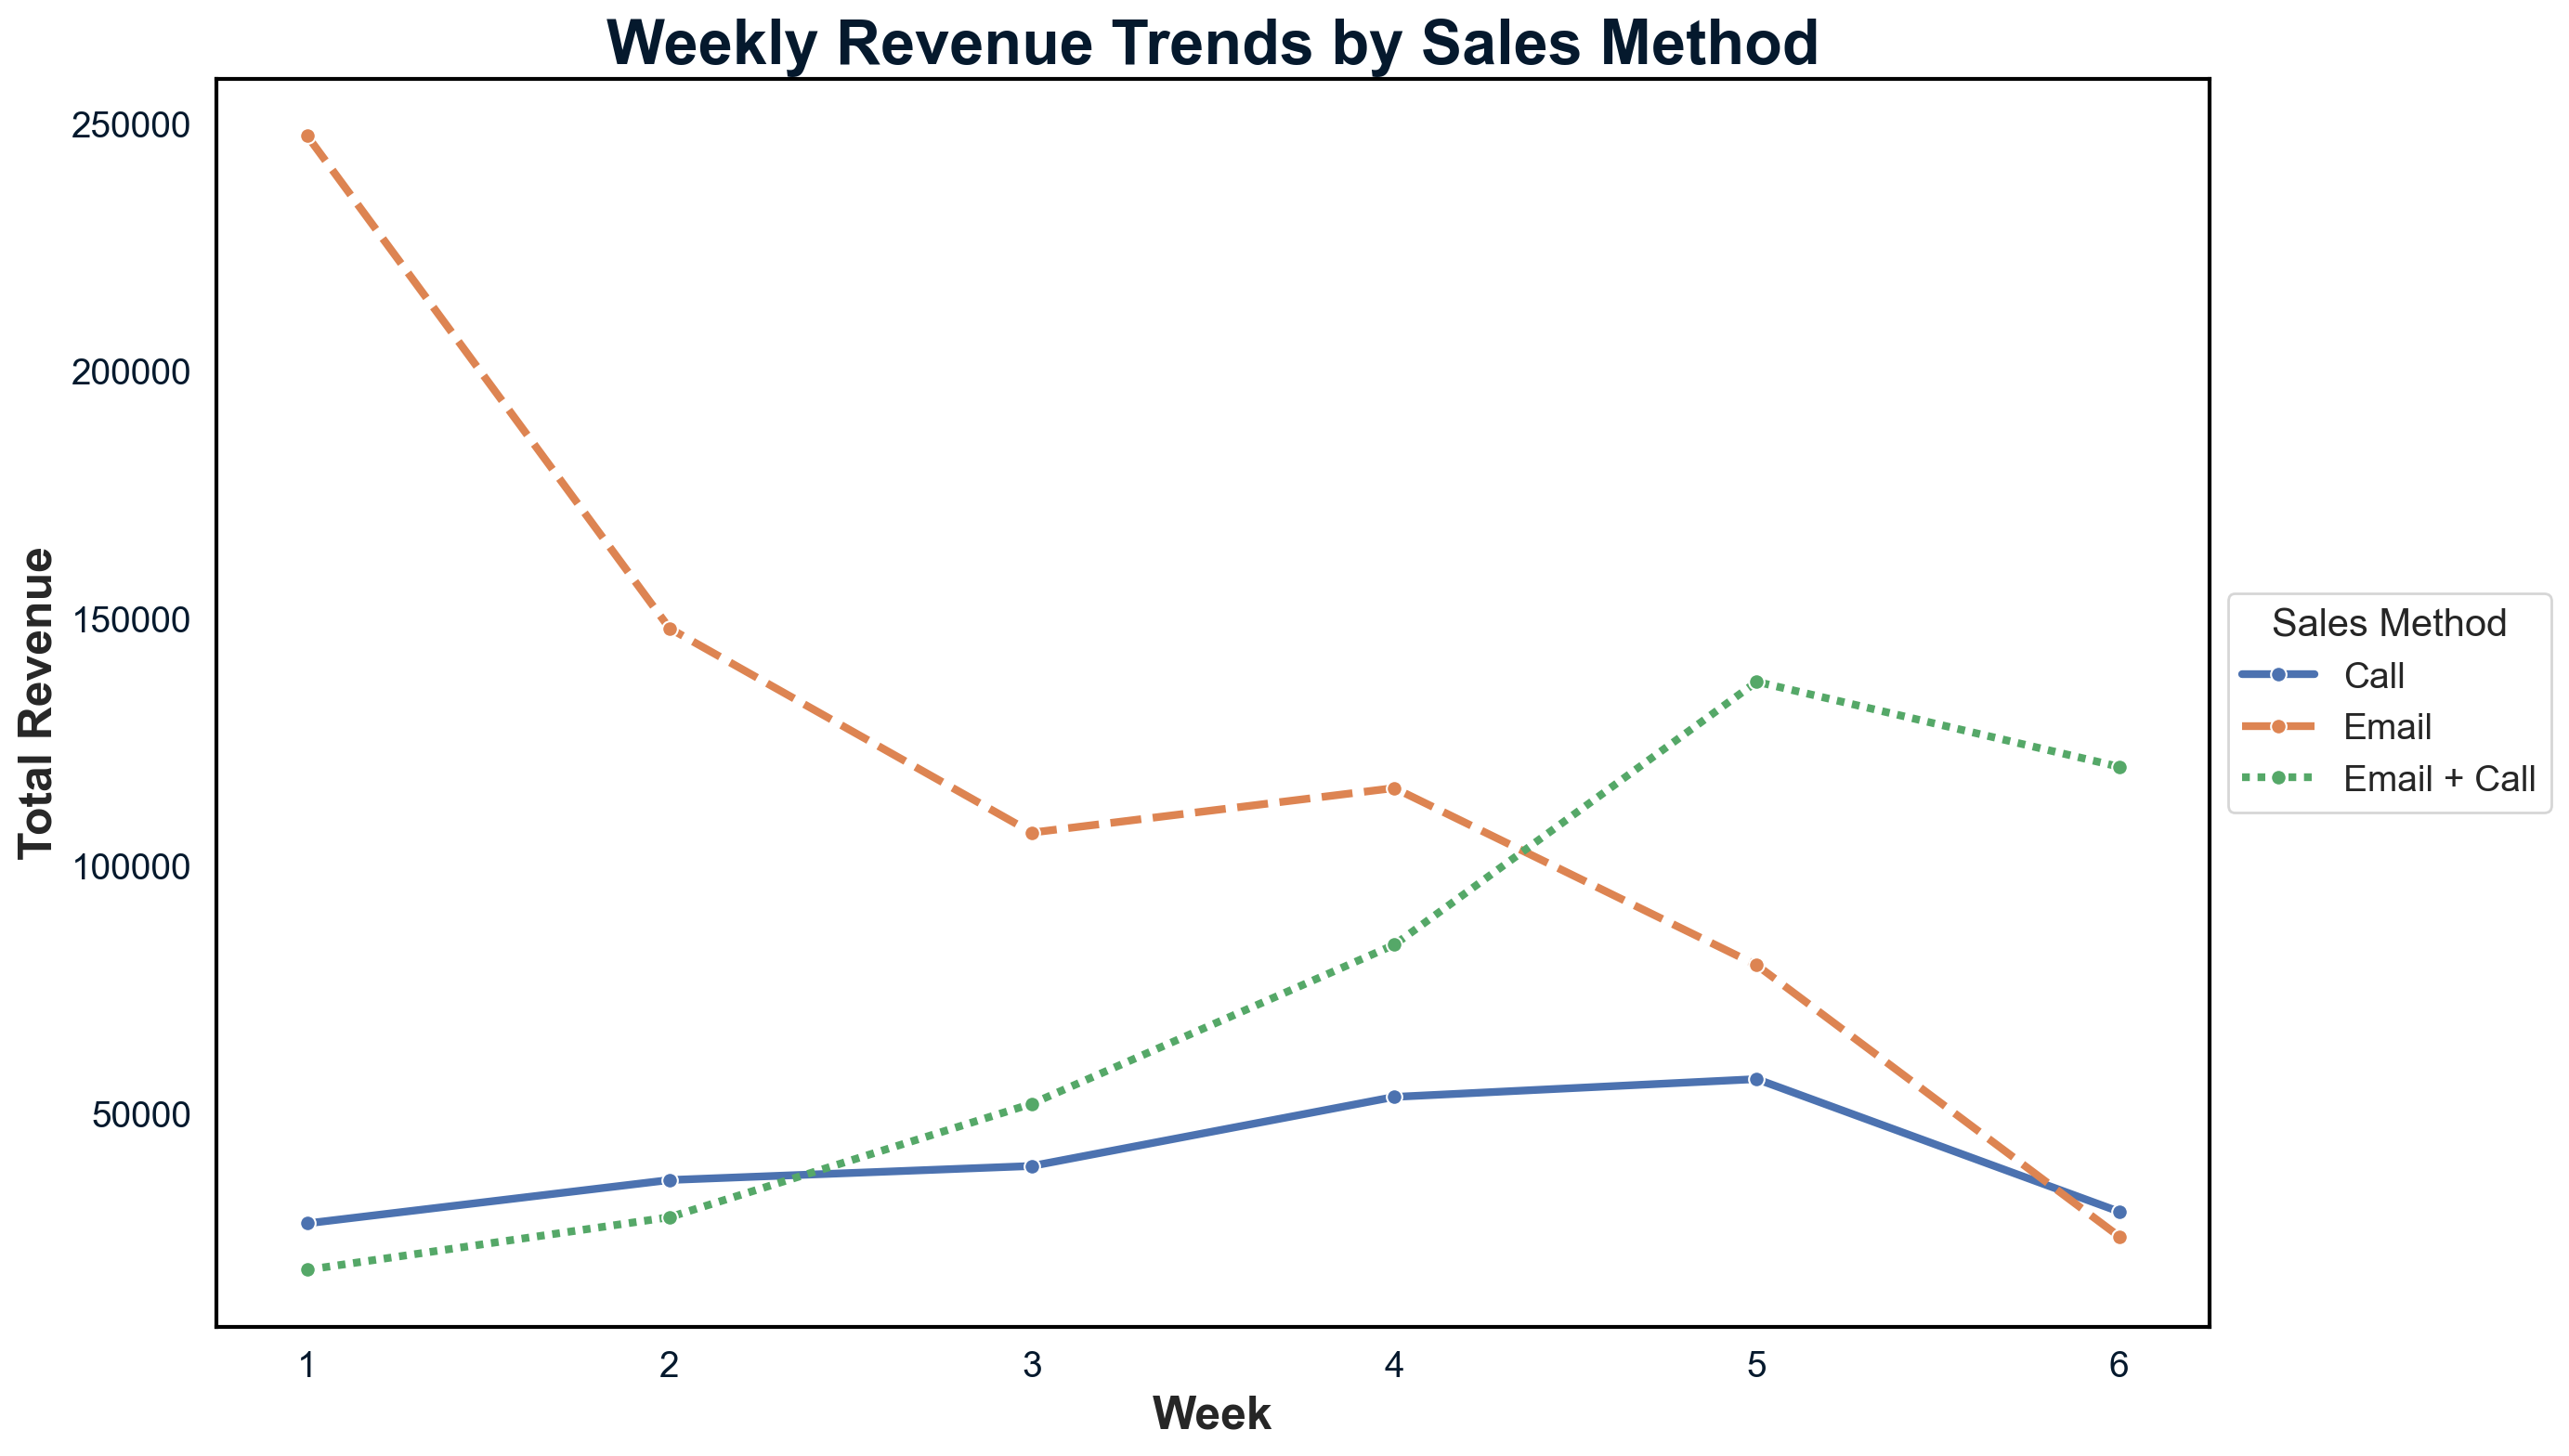

In [59]:
# Set the Seaborn style for a cleaner look
sns.set_theme(style="white")  # Use 'white' for no grid lines

# Grouping data by week and sales method to calculate total revenue per method per week
revenue_over_time = product_sales.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

# Creating the line plot for weekly revenue trends
plt.figure(figsize=(14, 8))

# Using a more vibrant and professional color palette and bold lines
sns.lineplot(data=revenue_over_time, x='week', y='revenue', hue='sales_method', 
             marker='o', palette='deep', linewidth=3, style='sales_method')

# Enhancing the title and labels with larger font sizes
plt.title('Weekly Revenue Trends by Sales Method', fontsize=24, fontweight='bold')
plt.xlabel('Week', fontsize=18, fontweight='bold')
plt.ylabel('Total Revenue', fontsize=18, fontweight='bold')

# Customizing the y-axis ticks for better clarity
plt.yticks(fontsize=14)  # Increase font size for y-axis ticks
plt.xticks(range(product_sales['week'].min(), product_sales['week'].max() + 1), fontsize=14)

# Adding black borders to the figure
plt.gca().spines['top'].set_color('black')
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(1.5)

# Positioning the legend on the right and adjusting its style
plt.legend(title='Sales Method', title_fontsize='15', fontsize='14', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# Display the plot
plt.show()

### **Insight:**

The chart provides a clear illustration of the revenue trends over a six-week period for the different sales methods: **Call**, **Email**, and **Email + Call**. 

1. **Overall Revenue Performance:**
   - The general trend shows a decrease in total revenue over time, which is a cause for concern. This downward trajectory suggests that the initial boost seen in Week 1 may not have been sustained, necessitating a review of sales strategies or market conditions.

2. **Sales Method Performance:**
   - **Email:** Initially, the Email method was the leading revenue generator, peaking in Week 1. However, it experienced a sharp decline in Weeks 2 and 3, with only minor stabilization in later weeks. This indicates that while Email is an effective initial contact method, it may require additional support or follow-up to maintain momentum.
   - **Call:** The Call method consistently underperformed compared to the other methods. Despite slight increases, its revenue contribution remained the lowest throughout the period. This consistent underperformance suggests that calls alone may not be an efficient or impactful sales approach.
   - **Email + Call:** The combined Email + Call method demonstrated steady growth, ultimately surpassing the other methods in revenue generation by Week 6. This consistent upward trend highlights the strength of a multifaceted approach, suggesting that combining methods can create a synergistic effect, leading to more robust sales performance.

3. **Strategic Recommendation:**
   - Given the data, it is clear that the **Email + Call** method is the most effective strategy, particularly in sustaining and growing revenue over time. This approach should be prioritized and potentially expanded. 
   - In contrast, the **Email** method's decline indicates a need for strategy refinement, possibly through better targeting, content optimization, or integration with other methods.
   - **Call** strategies, given their underperformance, might be re-evaluated or used more selectively, potentially in combination with email campaigns to boost effectiveness.

4. **Future Actions:**
   - **Optimize the Website and User Experience:** To enhance the effectiveness of all methods, improving the website interface, promoting it more effectively, and ensuring a seamless user experience can help convert visits into sales more consistently.
   - **Monitor Trends:** Ongoing monitoring of these trends is essential. Continuous assessment will allow for timely adjustments and ensure that the sales strategies remain aligned with market responses.

These insights are crucial for informing future sales strategies and ensuring that the chosen methods continue to drive revenue growth effectively.

# **Task 3: Definition of a Metric for the Business to Monitor**


### **Sales Efficiency Index (SEI) and Total Revenue Analysis**

In this section, we delve into evaluating the performance of various sales methods by calculating the Sales Efficiency Index (SEI) and analyzing total revenue. The SEI is a key metric that helps us understand how effectively each sales method converts effort into revenue.

#### **Definition of Sales Efficiency Index (SEI):**
The **Sales Efficiency Index (SEI)** quantifies the revenue generated per unit of effort invested in each sales method. It is defined by the following formula:

**SEI = Total Revenue / Estimated Effort**


where:
- **Total Revenue**: The cumulative revenue generated by a specific sales method.
- **Estimated Effort**: A relative score representing the resources and time required for the sales method. Higher scores indicate greater effort.

#### **Initial Effort Values Used:**
For this analysis, we have assigned the following relative effort scores to each sales method based on qualitative assessments:
- **Email:** 1 (Least effort required)
- **Call:** 2 (Moderate effort required)
- **Email + Call:** 3 (Highest effort required)

These scores are used to compute the SEI, providing insights into which sales methods are most efficient in generating revenue relative to the effort expended.

#### **Objectives of This Analysis:**
1. **Calculate SEI:** Determine the efficiency of each sales method by calculating the SEI, which reflects the revenue per unit of effort.
2. **Analyze Total Revenue:** Compare the total revenue generated by each sales method to assess the overall financial performance.
3. **Visualize Insights:** Utilize a FacetGrid to create a comprehensive visualization of SEI and total revenue, enabling stakeholders to make data-driven decisions on optimizing sales strategies and resource allocation.

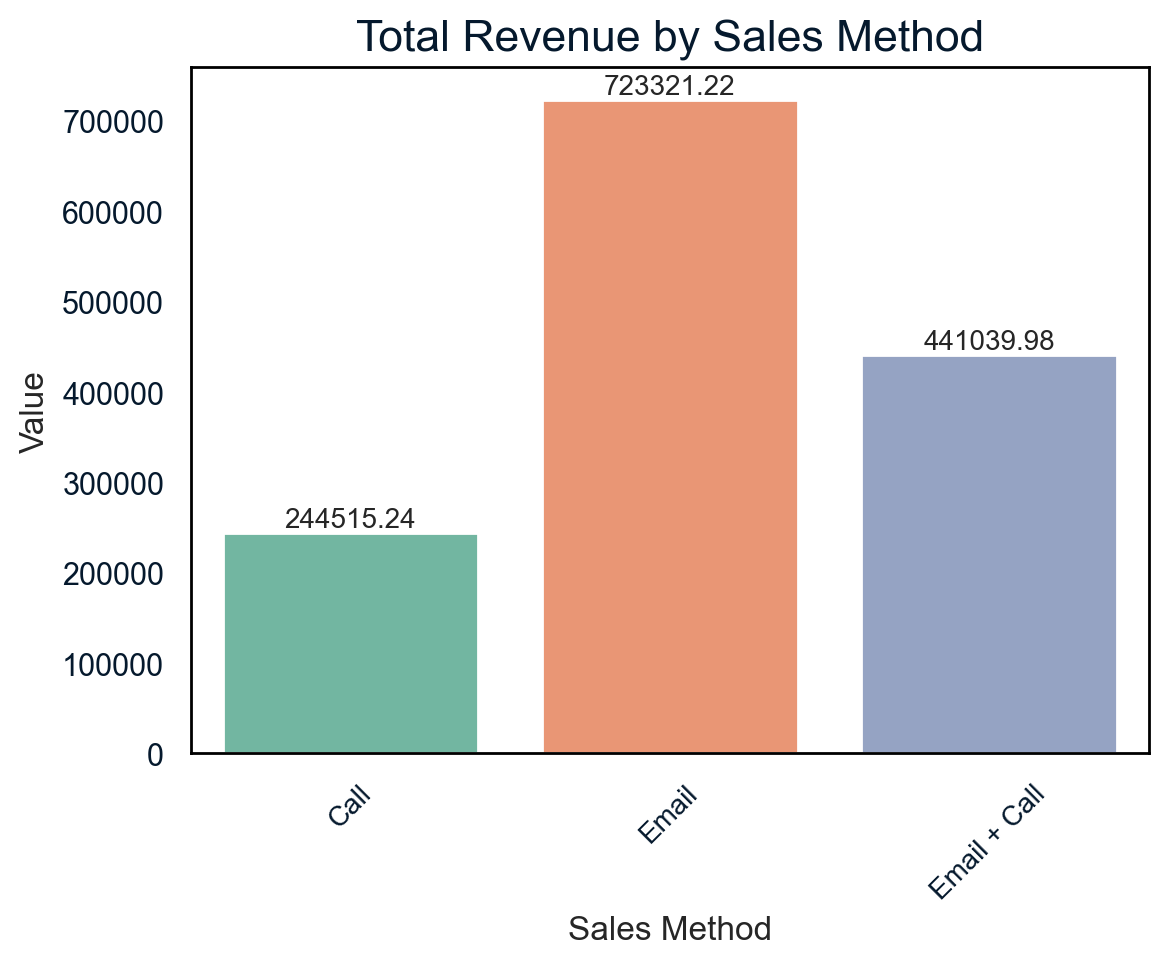

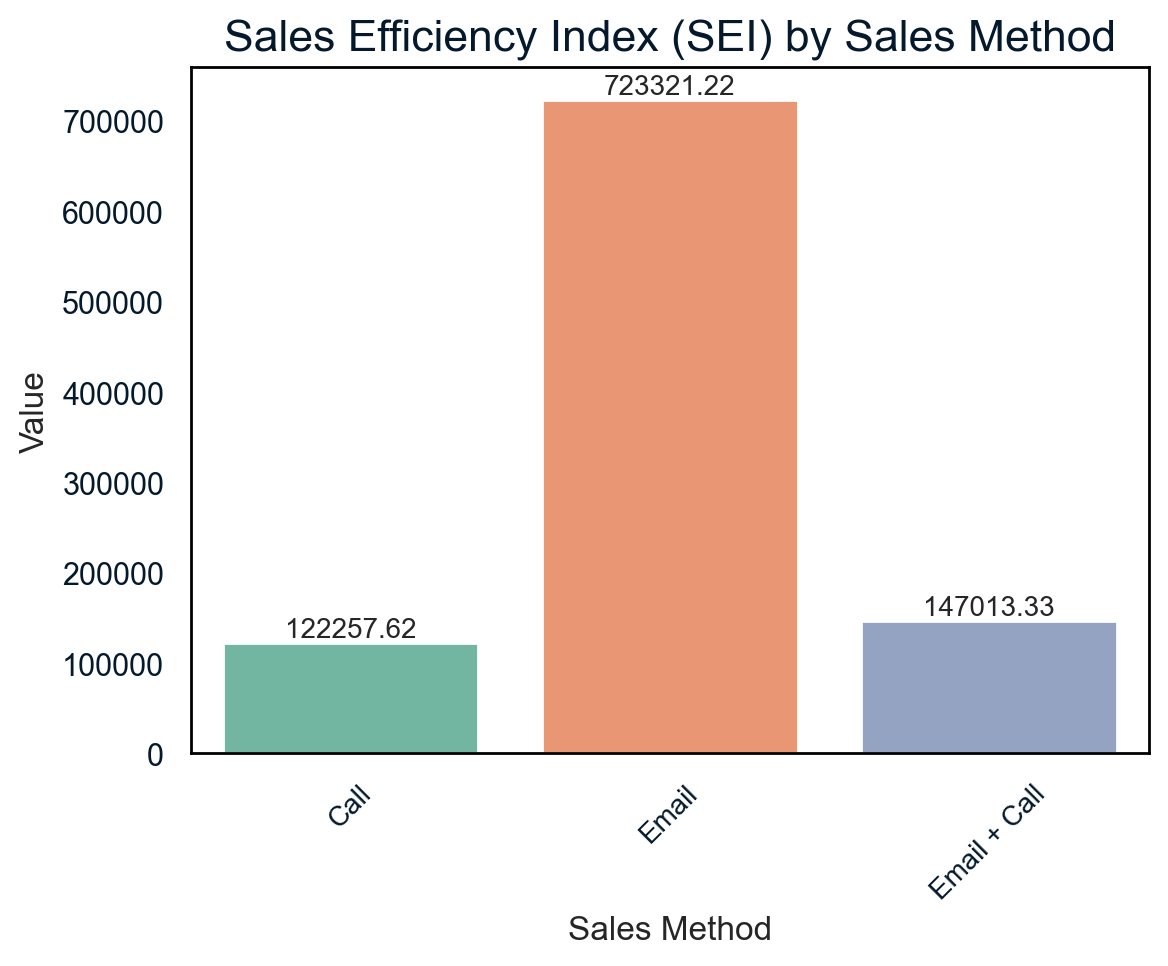

Sales Efficiency Index (SEI) and Total Revenue by Sales Method:


,sales_method,total_revenue,SEI
0,Call,244515.244602,122257.622301
1,Email,723321.218749,723321.218749
2,Email + Call,441039.984951,147013.328317


In [60]:

# Define the estimated effort scores for each sales method
effort_scores = {
    'Email': 1,       # Assuming Email takes the least effort
    'Call': 2,        # Assuming Call takes more effort than Email
    'Email + Call': 3 # Assuming Email + Call takes the most effort
}

# Calculate total revenue by sales method
total_revenue_by_method = product_sales.groupby('sales_method')['revenue'].sum()

# Calculate SEI for each sales method
sei = total_revenue_by_method / total_revenue_by_method.index.map(effort_scores)

# Combine SEI and total revenue into a single DataFrame
sei_df = pd.DataFrame({
    'sales_method': total_revenue_by_method.index,
    'total_revenue': total_revenue_by_method.values,
    'SEI': sei.values
})

# Melt the DataFrame for use with FacetGrid
sei_melted = pd.melt(sei_df, id_vars=['sales_method'], value_vars=['total_revenue', 'SEI'], 
                     var_name='Metric', value_name='Value')

# Set the aesthetics for the plots
sns.set_theme(style="whitegrid")

# Create separate figures for total revenue and SEI
metrics = ['total_revenue', 'SEI']
titles = ['Total Revenue by Sales Method', 'Sales Efficiency Index (SEI) by Sales Method']

for metric, title in zip(metrics, titles):
    plt.figure(figsize=(6, 5))  # Adjusted size for slide presentation
    sns.barplot(data=sei_melted[sei_melted['Metric'] == metric], 
                x='sales_method', 
                y='Value', 
                palette="Set2", 
                order=sei_df['sales_method'])
    
    # Add labels and title
    plt.title(title, fontsize=16)
    plt.xlabel("Sales Method", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    
    # Add values on top of bars
    for bar in plt.gca().patches:
        bar_height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, 
                 bar_height + 0.05, 
                 round(bar_height, 2), 
                 ha='center', 
                 va='bottom', 
                 fontsize=10)
    
    # Remove grid
    plt.grid(False)
    
    # Add a border around the figure
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['top'].set_linewidth(1)
    plt.gca().spines['right'].set_color('black')
    plt.gca().spines['right'].set_linewidth(1)
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['left'].set_linewidth(1)
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['bottom'].set_linewidth(1)
    
    plt.tight_layout()
    plt.savefig(f"{metric}_plot.png", dpi=300)  # Save with high resolution
    plt.show()

# Print SEI and total revenue by sales method for reference
print('Sales Efficiency Index (SEI) and Total Revenue by Sales Method:')
sei_df


The data reveals critical insights into our sales methods:

1. **Email-Only Method**: This method stands out with an exceptionally high SEI, indicating it generates the most revenue per unit of effort. Moreover, it contributes the largest share to our total revenue, making it both highly efficient and the most significant driver of our sales performance. This suggests that our Email-only campaigns are highly effective with minimal resource expenditure.

2. **Email + Call Method**: While this method is effective in generating substantial revenue, its SEI is lower due to the higher resources required. However, the significant revenue it produces cannot be overlooked. This method may be more appropriate for high-value clients where the additional effort yields higher returns, justifying its continued use in targeted scenarios.

3. **Call-Only Method**: The Call-only method has the lowest SEI, making it the least efficient of our strategies. While it does generate a notable amount of revenue, the high effort involved suggests that this method may not be the best use of our resources. It might be more strategic to reserve this method for specific cases where personal interaction is essential and can lead to higher conversion rates.

**Strategic Recommendation**: If the primary goal is to maximize efficiency, the Email method should be prioritized. However, if the focus is also on balancing total revenue with efficiency, a combined approach of Email + Call could be beneficial, especially for high-value sales or key customers. This method allows us to maintain high efficiency while strategically investing additional resources where they will have the most significant impact. The Call-only method should be re-evaluated, with its use potentially streamlined for scenarios where personal engagement is critical.

This approach will optimize our sales operations, driving higher profitability and a more effective use of resources while ensuring that we maintain the flexibility to tailor our strategy to different customer segments.

# **Task 4: Final Summary and Strategic Recommendations**

## **Key Insights:**

1. **Sales Efficiency Index (SEI) Findings:**
   - **Email** method leads in SEI, demonstrating the highest efficiency in converting effort into revenue.
   - **Email + Call** method, while less efficient, generates the highest total revenue, proving effective for high-value or complex sales.
   - **Call** method has the lowest SEI, indicating it is less efficient and requires reassessment of its role in the strategy.

2. **Total Revenue Analysis:**
   - **Revenue Over Time:** Revenue data shows fluctuations across all sales methods, with the **Email + Call** method experiencing notable growth during specific periods. This indicates its effectiveness in certain contexts and highlights its strategic value.
   - **Email Method:** Leads in both SEI and total revenue, making it a cornerstone of the sales strategy.
   - **Call Method:** Shows lower revenue and efficiency, suggesting a need to review and potentially reallocate resources.

3. **Correlation Between Site Visits and Sales:**
   - Positive correlation between `nb_site_visits` and `nb_sold` suggests that increased customer engagement through site visits tends to result in higher sales volumes. This reinforces the importance of driving customer interactions.

## **Recommendations for Stakeholders:**

1. **Optimize Sales Strategies:**
   - **Leverage Email Campaigns:** Focus on Email due to its high SEI and substantial revenue contribution. It’s an efficient and effective method for broad outreach.
   - **Utilize Combined Approaches:** Apply the Email + Call method for high-value or complex sales, balancing efficiency with significant revenue potential. Its effectiveness during peak periods should be leveraged strategically.

2. **Reassess Resource Allocation:**
   - **Evaluate Call Method:** Review and optimize the resource allocation for the Call method. Given its lower SEI and revenue contribution, consider enhancing its effectiveness or shifting resources to more efficient methods.
   - **Adjust Effort Scores:** Regularly update the effort scores used in SEI calculations to ensure they reflect current sales processes and practices.

3. **Enhance Customer Engagement:**
   - **Focus on Increasing Site Visits:** Invest in strategies to boost customer site visits, such as improved website features and targeted marketing. The positive correlation with sales indicates that higher engagement drives better sales outcomes.
   - **Monitor Revenue Trends:** Track revenue fluctuations over time to adjust strategies based on performance during different periods. This will help maintain consistency and capitalize on growth opportunities.

4. **Monitor and Adapt Sales Tactics:**
   - **Track SEI and Revenue Metrics:** Regularly review SEI and revenue metrics to make informed decisions and refine sales strategies. Continuous monitoring will ensure that the sales approach remains effective and aligned with business objectives.
   - **Leverage Customer Insights:** Utilize data on customer engagement to tailor sales strategies. Understanding customer behavior will enhance sales effectiveness and drive better results.

By implementing these recommendations, stakeholders can optimize their sales strategy, improve resource allocation, and achieve better financial outcomes. This comprehensive analysis provides a solid foundation for making data-driven decisions that align with the company’s strategic goals.


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation